In [34]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [35]:
IMG_SIZE = 256
cat_folder = 'Cat'
dog_folder = 'Dog'


def load_images_from_folder(folder, label, limit=None):
    images, labels = [], []
    for idx, filename in enumerate(os.listdir(folder)):
        if limit and idx >= limit:
            break
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)
    return images, labels

cat_images, cat_labels = load_images_from_folder(cat_folder, 0, limit=200)
dog_images, dog_labels = load_images_from_folder(dog_folder, 1, limit=200)

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

X = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
def evaluate_model(y_true, y_pred, title=''):
    print(f"--- {title} ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

--- Logistic Regression без PCA ---
Accuracy:  0.6125
Precision: 0.5957
Recall:    0.7000
F1-score:  0.6437

Classification Report:
              precision    recall  f1-score   support

         Cat       0.64      0.53      0.58        40
         Dog       0.60      0.70      0.64        40

    accuracy                           0.61        80
   macro avg       0.62      0.61      0.61        80
weighted avg       0.62      0.61      0.61        80



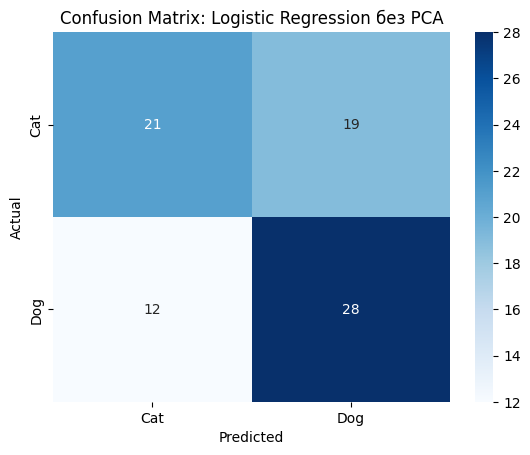

In [38]:
clf_logreg = LogisticRegression(max_iter=1000, random_state=42)
clf_logreg.fit(X_train_scaled, y_train)
y_pred_logreg = clf_logreg.predict(X_test_scaled)
evaluate_model(y_test, y_pred_logreg, title="Logistic Regression без PCA")


--- Оценка при n_components = 10 ---
--- Logistic Regression с PCA (n=10) ---
Accuracy:  0.5875
Precision: 0.5897
Recall:    0.5750
F1-score:  0.5823

Classification Report:
              precision    recall  f1-score   support

         Cat       0.59      0.60      0.59        40
         Dog       0.59      0.57      0.58        40

    accuracy                           0.59        80
   macro avg       0.59      0.59      0.59        80
weighted avg       0.59      0.59      0.59        80



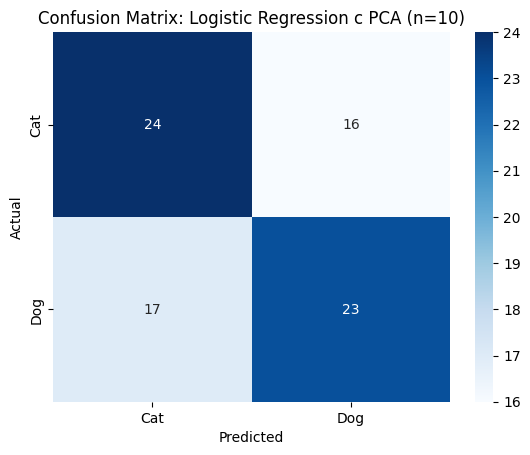


--- Оценка при n_components = 20 ---
--- Logistic Regression с PCA (n=20) ---
Accuracy:  0.5625
Precision: 0.5581
Recall:    0.6000
F1-score:  0.5783

Classification Report:
              precision    recall  f1-score   support

         Cat       0.57      0.53      0.55        40
         Dog       0.56      0.60      0.58        40

    accuracy                           0.56        80
   macro avg       0.56      0.56      0.56        80
weighted avg       0.56      0.56      0.56        80



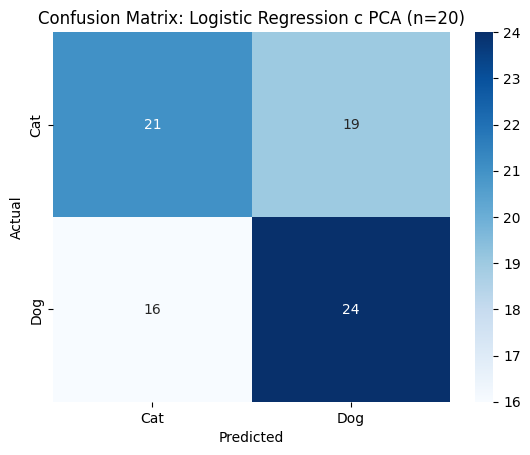


--- Оценка при n_components = 30 ---
--- Logistic Regression с PCA (n=30) ---
Accuracy:  0.6250
Precision: 0.6087
Recall:    0.7000
F1-score:  0.6512

Classification Report:
              precision    recall  f1-score   support

         Cat       0.65      0.55      0.59        40
         Dog       0.61      0.70      0.65        40

    accuracy                           0.62        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.63      0.62      0.62        80



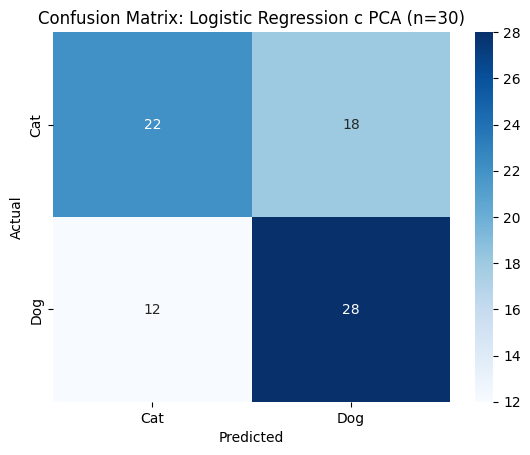


--- Оценка при n_components = 40 ---
--- Logistic Regression с PCA (n=40) ---
Accuracy:  0.6625
Precision: 0.6383
Recall:    0.7500
F1-score:  0.6897

Classification Report:
              precision    recall  f1-score   support

         Cat       0.70      0.57      0.63        40
         Dog       0.64      0.75      0.69        40

    accuracy                           0.66        80
   macro avg       0.67      0.66      0.66        80
weighted avg       0.67      0.66      0.66        80



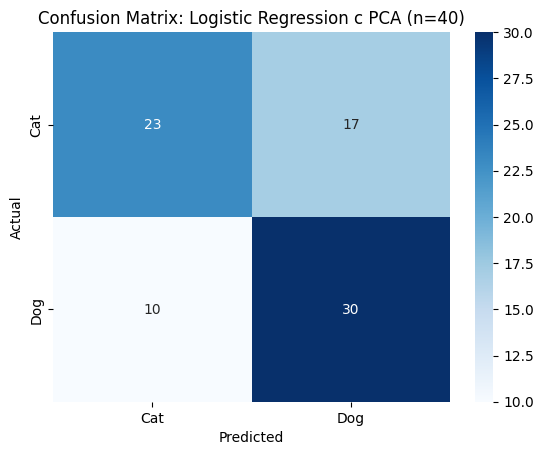


--- Оценка при n_components = 50 ---
--- Logistic Regression с PCA (n=50) ---
Accuracy:  0.6625
Precision: 0.6275
Recall:    0.8000
F1-score:  0.7033

Classification Report:
              precision    recall  f1-score   support

         Cat       0.72      0.53      0.61        40
         Dog       0.63      0.80      0.70        40

    accuracy                           0.66        80
   macro avg       0.68      0.66      0.66        80
weighted avg       0.68      0.66      0.66        80



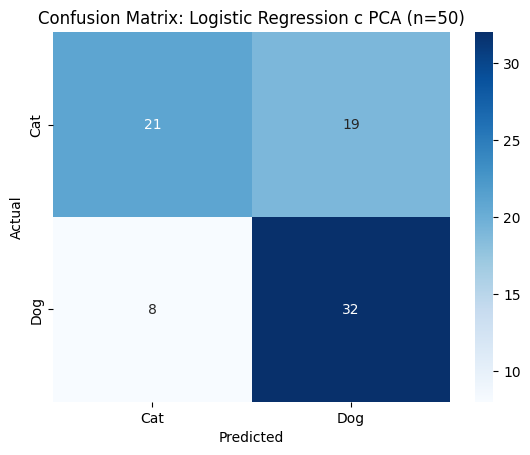


--- Оценка при n_components = 60 ---
--- Logistic Regression с PCA (n=60) ---
Accuracy:  0.6875
Precision: 0.6415
Recall:    0.8500
F1-score:  0.7312

Classification Report:
              precision    recall  f1-score   support

         Cat       0.78      0.53      0.63        40
         Dog       0.64      0.85      0.73        40

    accuracy                           0.69        80
   macro avg       0.71      0.69      0.68        80
weighted avg       0.71      0.69      0.68        80



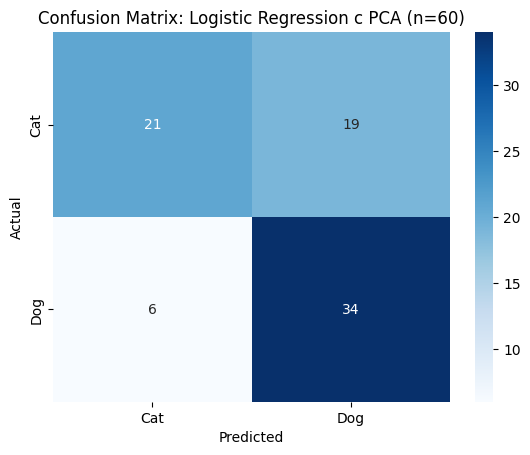


--- Оценка при n_components = 70 ---
--- Logistic Regression с PCA (n=70) ---
Accuracy:  0.6500
Precision: 0.6154
Recall:    0.8000
F1-score:  0.6957

Classification Report:
              precision    recall  f1-score   support

         Cat       0.71      0.50      0.59        40
         Dog       0.62      0.80      0.70        40

    accuracy                           0.65        80
   macro avg       0.66      0.65      0.64        80
weighted avg       0.66      0.65      0.64        80



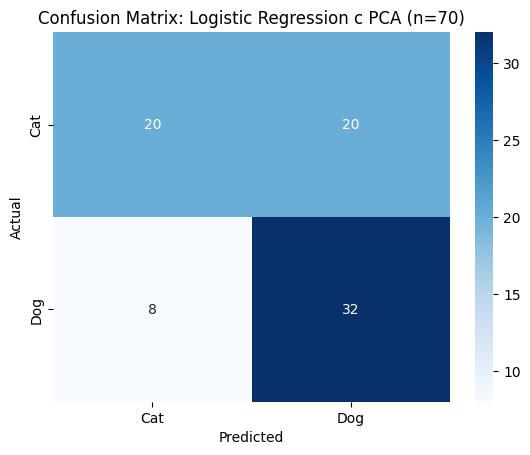


--- Оценка при n_components = 80 ---
--- Logistic Regression с PCA (n=80) ---
Accuracy:  0.6500
Precision: 0.6154
Recall:    0.8000
F1-score:  0.6957

Classification Report:
              precision    recall  f1-score   support

         Cat       0.71      0.50      0.59        40
         Dog       0.62      0.80      0.70        40

    accuracy                           0.65        80
   macro avg       0.66      0.65      0.64        80
weighted avg       0.66      0.65      0.64        80



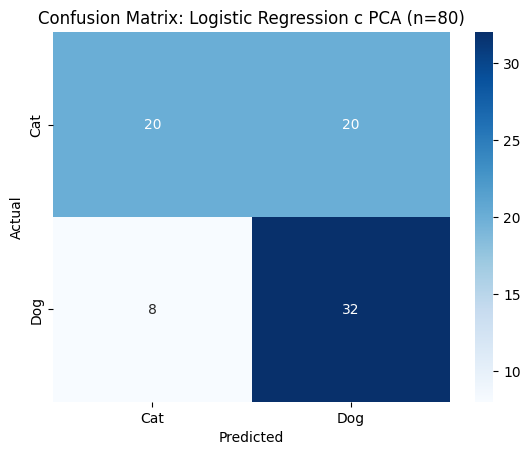


--- Оценка при n_components = 90 ---
--- Logistic Regression с PCA (n=90) ---
Accuracy:  0.6500
Precision: 0.6200
Recall:    0.7750
F1-score:  0.6889

Classification Report:
              precision    recall  f1-score   support

         Cat       0.70      0.53      0.60        40
         Dog       0.62      0.78      0.69        40

    accuracy                           0.65        80
   macro avg       0.66      0.65      0.64        80
weighted avg       0.66      0.65      0.64        80



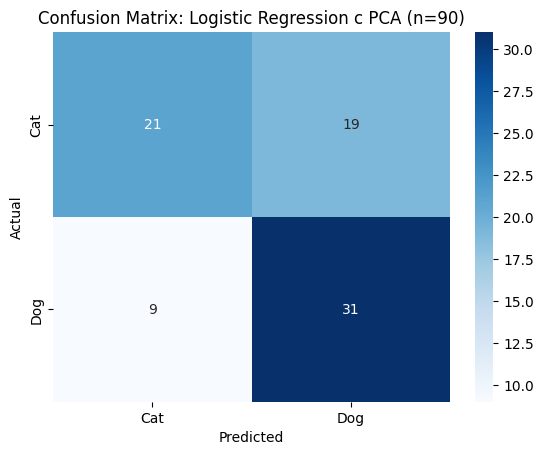


--- Оценка при n_components = 100 ---
--- Logistic Regression с PCA (n=100) ---
Accuracy:  0.6625
Precision: 0.6275
Recall:    0.8000
F1-score:  0.7033

Classification Report:
              precision    recall  f1-score   support

         Cat       0.72      0.53      0.61        40
         Dog       0.63      0.80      0.70        40

    accuracy                           0.66        80
   macro avg       0.68      0.66      0.66        80
weighted avg       0.68      0.66      0.66        80



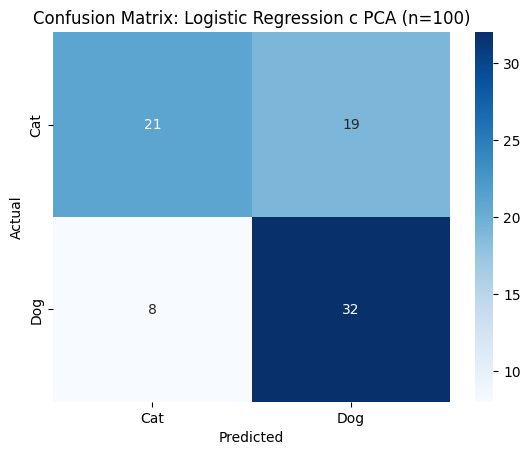


--- Оценка при n_components = 110 ---
--- Logistic Regression с PCA (n=110) ---
Accuracy:  0.7000
Precision: 0.6739
Recall:    0.7750
F1-score:  0.7209

Classification Report:
              precision    recall  f1-score   support

         Cat       0.74      0.62      0.68        40
         Dog       0.67      0.78      0.72        40

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.70      0.70      0.70        80



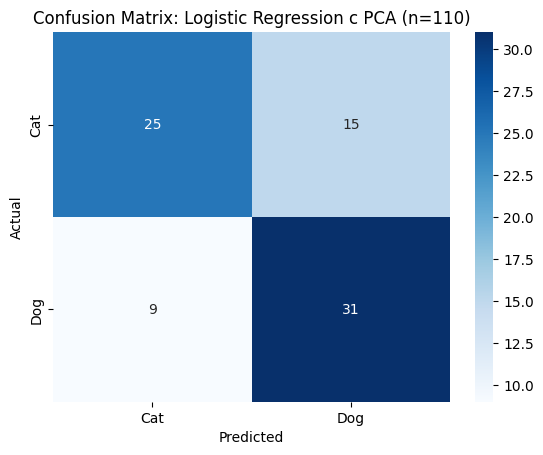


--- Оценка при n_components = 120 ---
--- Logistic Regression с PCA (n=120) ---
Accuracy:  0.6750
Precision: 0.6400
Recall:    0.8000
F1-score:  0.7111

Classification Report:
              precision    recall  f1-score   support

         Cat       0.73      0.55      0.63        40
         Dog       0.64      0.80      0.71        40

    accuracy                           0.68        80
   macro avg       0.69      0.68      0.67        80
weighted avg       0.69      0.68      0.67        80



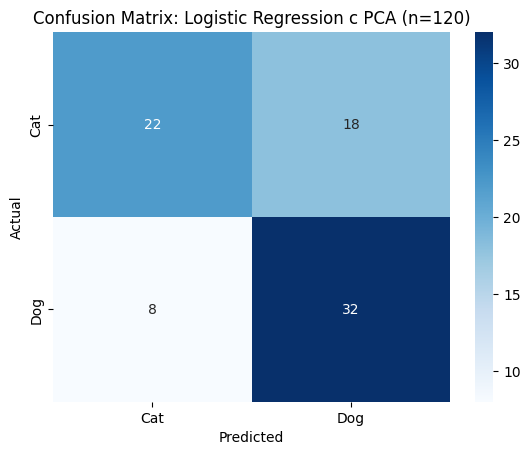


--- Оценка при n_components = 130 ---
--- Logistic Regression с PCA (n=130) ---
Accuracy:  0.6000
Precision: 0.5909
Recall:    0.6500
F1-score:  0.6190

Classification Report:
              precision    recall  f1-score   support

         Cat       0.61      0.55      0.58        40
         Dog       0.59      0.65      0.62        40

    accuracy                           0.60        80
   macro avg       0.60      0.60      0.60        80
weighted avg       0.60      0.60      0.60        80



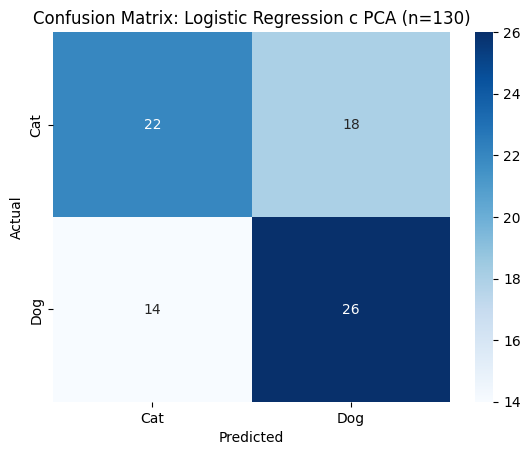


--- Оценка при n_components = 140 ---
--- Logistic Regression с PCA (n=140) ---
Accuracy:  0.6500
Precision: 0.6304
Recall:    0.7250
F1-score:  0.6744

Classification Report:
              precision    recall  f1-score   support

         Cat       0.68      0.57      0.62        40
         Dog       0.63      0.72      0.67        40

    accuracy                           0.65        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.65      0.65      0.65        80



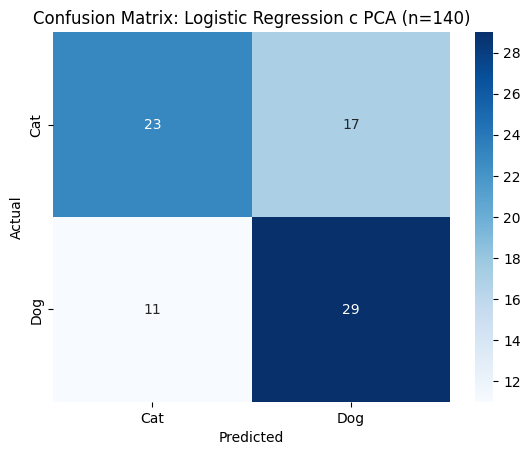


Наилучшая точность: 0.7000 при n = 110


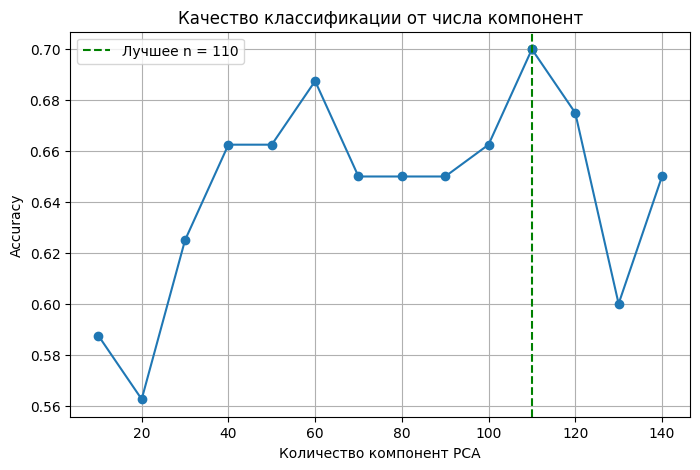

In [39]:
accuracies = []
best_n = None
best_acc = 0.0
components_range = list(range(10, 141, 10))

for n in components_range:
    print(f"\n--- Оценка при n_components = {n} ---")
    pca_tmp = PCA(n_components=n)
    X_train_pca_tmp = pca_tmp.fit_transform(X_train_scaled)
    X_test_pca_tmp = pca_tmp.transform(X_test_scaled)
    clf_tmp = LogisticRegression(max_iter=1000, random_state=42)
    clf_tmp.fit(X_train_pca_tmp, y_train)
    y_pred_tmp = clf_tmp.predict(X_test_pca_tmp)
    acc = accuracy_score(y_test, y_pred_tmp)
    accuracies.append(acc)
    if acc > best_acc:
        y_pred_pca_logreg = y_pred_tmp
        best_acc = acc
        best_n = n
    evaluate_model(y_test, y_pred_tmp, title=f"Logistic Regression с PCA (n={n})")

print(f"\nНаилучшая точность: {best_acc:.4f} при n = {best_n}")

# График с выделением точки с максимальной точностью
plt.figure(figsize=(8, 5))
plt.plot(components_range, accuracies, marker='o')
plt.axvline(best_n, color='green', linestyle='--', label=f'Лучшее n = {best_n}')
plt.scatter([best_n], [best_acc], color='green')
plt.xlabel('Количество компонент PCA')
plt.ylabel('Accuracy')
plt.title('Качество классификации от числа компонент')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
pca_full = PCA().fit(X_train_scaled)
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
n_components_90 = np.argmax(cumsum >= 0.9) + 1
print(f"Компонент для 90% дисперсии: {n_components_90}")

Компонент для 90% дисперсии: 112


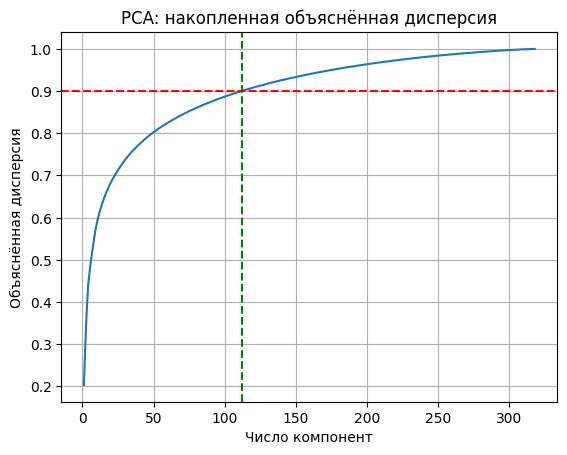

In [41]:
plt.plot(np.arange(1, len(cumsum) + 1), cumsum)
plt.axhline(0.9, color='r', linestyle='--')
plt.axvline(n_components_90, color='g', linestyle='--')
plt.xlabel('Число компонент')
plt.ylabel('Объяснённая дисперсия')
plt.title('PCA: накопленная объяснённая дисперсия')
plt.grid(True)
plt.show()

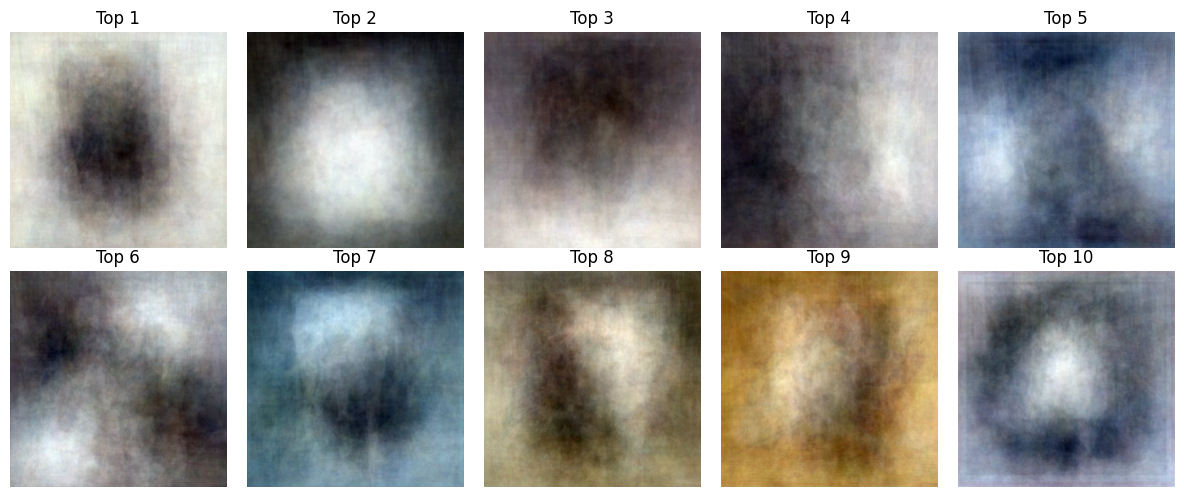

In [42]:
explained_variance = pca_full.explained_variance_
sorted_indices = np.argsort(explained_variance)[::-1][:10]
eigenvectors = pca_full.components_[sorted_indices]

plt.figure(figsize=(12, 5))
for i, idx in enumerate(sorted_indices):
    vec_img = eigenvectors[i].reshape(IMG_SIZE, IMG_SIZE, 3)
    vec_img = (vec_img - vec_img.min()) / (vec_img.max() - vec_img.min() + 1e-8)
    plt.subplot(2, 5, i + 1)
    plt.imshow(vec_img)
    plt.title(f'Top {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


--- Random Forest без PCA ---
Accuracy:  0.6000
Precision: 0.6000
Recall:    0.6000
F1-score:  0.6000

Classification Report:
              precision    recall  f1-score   support

         Cat       0.60      0.60      0.60        40
         Dog       0.60      0.60      0.60        40

    accuracy                           0.60        80
   macro avg       0.60      0.60      0.60        80
weighted avg       0.60      0.60      0.60        80



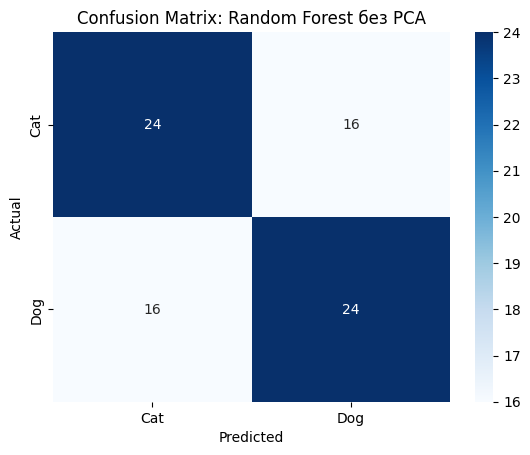

In [43]:
clf_rf_plain = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_plain.fit(X_train_scaled, y_train)
y_pred_rf_plain = clf_rf_plain.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf_plain, title="Random Forest без PCA")

Наилучшая точность Random Forest: 0.6500 при n = 40
--- Random Forest с PCA (n=40) ---
Accuracy:  0.6500
Precision: 0.6429
Recall:    0.6750
F1-score:  0.6585

Classification Report:
              precision    recall  f1-score   support

         Cat       0.66      0.62      0.64        40
         Dog       0.64      0.68      0.66        40

    accuracy                           0.65        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.65      0.65      0.65        80



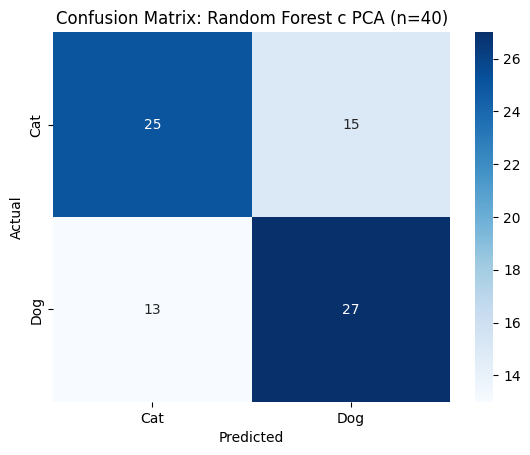

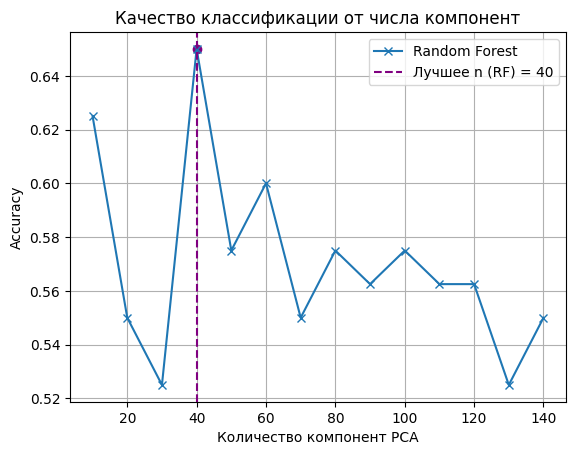

In [44]:
# Поиск лучшего PCA для RF
rf_accuracies = []
best_n_rf = None
best_acc_rf = 0.0
best_y_pred_rf = None

for n in components_range:
    pca_tmp = PCA(n_components=n)
    X_train_pca_tmp = pca_tmp.fit_transform(X_train_scaled)
    X_test_pca_tmp = pca_tmp.transform(X_test_scaled)
    clf_tmp = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_tmp.fit(X_train_pca_tmp, y_train)
    y_pred_tmp = clf_tmp.predict(X_test_pca_tmp)
    acc = accuracy_score(y_test, y_pred_tmp)
    rf_accuracies.append(acc)
    if acc > best_acc_rf:
        best_acc_rf = acc
        best_n_rf = n
        best_y_pred_rf = y_pred_tmp

print(f"Наилучшая точность Random Forest: {best_acc_rf:.4f} при n = {best_n_rf}")
evaluate_model(y_test, best_y_pred_rf, title=f"Random Forest с PCA (n={best_n_rf})")

# График точности для Random Forest
plt.plot(components_range, rf_accuracies, marker='x', label='Random Forest')
plt.axvline(best_n_rf, color='purple', linestyle='--', label=f'Лучшее n (RF) = {best_n_rf}')
plt.scatter([best_n_rf], [best_acc_rf], color='purple')

plt.xlabel('Количество компонент PCA')
plt.ylabel('Accuracy')
plt.title('Качество классификации от числа компонент')
plt.legend()
plt.grid(True)
plt.show()

                 Модель  Accuracy  F1-score
0        LogReg без PCA    0.6125  0.643678
1  LogReg с PCA (n=110)    0.7000  0.720930
2            RF без PCA    0.6000  0.600000
3       RF с PCA (n=40)    0.6500  0.658537


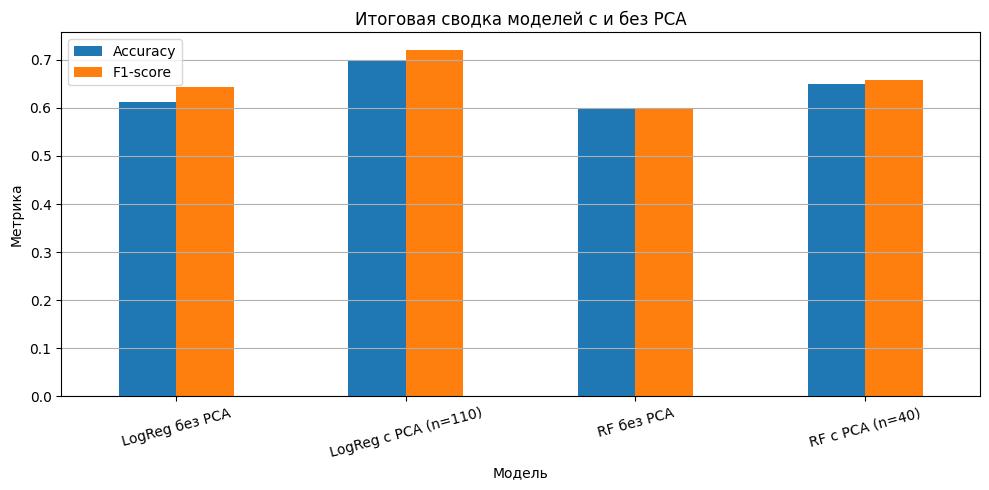

In [45]:
summary_results = [
    ("LogReg без PCA", accuracy_score(y_test, y_pred_logreg), f1_score(y_test, y_pred_logreg)),
    (f"LogReg с PCA (n={best_n})", accuracy_score(y_test, y_pred_pca_logreg), f1_score(y_test, y_pred_pca_logreg)),
    ("RF без PCA", accuracy_score(y_test, y_pred_rf_plain), f1_score(y_test, y_pred_rf_plain)),
    (f"RF с PCA (n={best_n_rf})", best_acc_rf, f1_score(y_test, best_y_pred_rf))
]

summary_df = pd.DataFrame(summary_results, columns=["Модель", "Accuracy", "F1-score"])
print(summary_df)

summary_df.set_index("Модель").plot(kind="bar", figsize=(10, 5))
plt.title("Итоговая сводка моделей с и без PCA")
plt.ylabel("Метрика")
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
